Moment of Inertia I_z: 0.3291


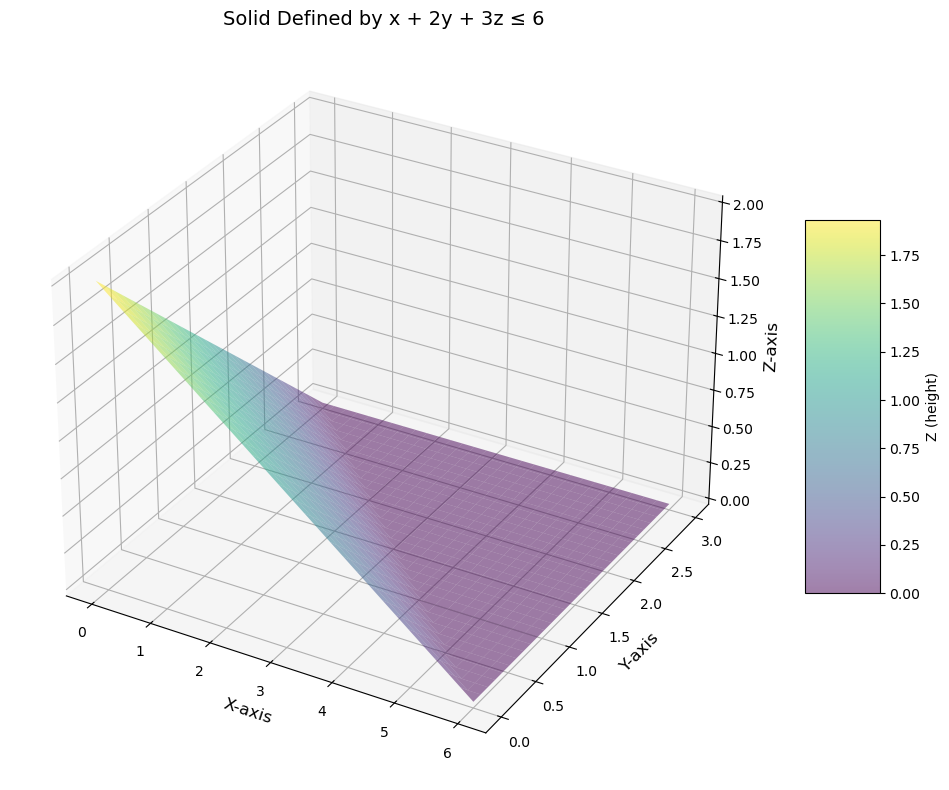

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gauss-Legendre quadrature points and weights for 3-point integration
GAUSS_POINTS = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
GAUSS_WEIGHTS = np.array([5/9, 8/9, 5/9])

def density(x, y, z):
    """
    Calculate the density of the solid at a given point.

    Parameters:
        x (float): x-coordinate.
        y (float): y-coordinate.
        z (float): z-coordinate.

    Returns:
        float: Density value at (x, y, z).
    """
    return x**2 * y * z

def gauss_legendre_3d(func, x_limits, y_limits_func, z_limits_func):
    """
    Compute a 3D integral using Gauss-Legendre quadrature.

    Parameters:
        func (callable): Function to integrate, with signature func(x, y, z).
        x_limits (list): Lower and upper bounds for x [x_min, x_max].
        y_limits_func (callable): Function returning y bounds [y_min, y_max] given x.
        z_limits_func (callable): Function returning z bounds [z_min, z_max] given x, y.

    Returns:
        float: Approximated value of the 3D integral.
    """
    integral = 0.0
    x_scale = (x_limits[1] - x_limits[0]) / 2
    x_shift = (x_limits[1] + x_limits[0]) / 2

    for i, xi_point in enumerate(GAUSS_POINTS):
        xi = x_scale * xi_point + x_shift
        wx = GAUSS_WEIGHTS[i]
        y_limits = y_limits_func(xi)
        y_scale = (y_limits[1] - y_limits[0]) / 2
        y_shift = (y_limits[1] + y_limits[0]) / 2

        for j, yj_point in enumerate(GAUSS_POINTS):
            yi = y_scale * yj_point + y_shift
            wy = GAUSS_WEIGHTS[j]
            z_limits = z_limits_func(xi, yi)
            z_scale = (z_limits[1] - z_limits[0]) / 2
            z_shift = (z_limits[1] + z_limits[0]) / 2

            for k, zk_point in enumerate(GAUSS_POINTS):
                zi = z_scale * zk_point + z_shift
                wz = GAUSS_WEIGHTS[k]

                f_val = func(xi, yi, zi)
                integral += f_val * wx * wy * wz

    # Scale the integral by the Jacobian
    return integral * x_scale * y_scale * z_scale

def inertia_z():
    """
    Calculate the moment of inertia I_z for a solid defined by x + 2y + 3z <= 6.

    Returns:
        float: Moment of inertia about the z-axis.
    """
    def integrand(x, y, z):
        """Integrand for moment of inertia: (x^2 + y^2) * density."""
        return (x**2 + y**2) * density(x, y, z)

    return gauss_legendre_3d(
        integrand,
        x_limits=[0, 6],
        y_limits_func=lambda x: [0, (6 - x) / 2],
        z_limits_func=lambda x, y: [0, (6 - x - 2 * y) / 3]
    )

def plot_solid(figsize=(10, 8), dpi=300):
    """
    Visualize the solid defined by x + 2y + 3z <= 6 as a 3D surface.

    Parameters:
        figsize (tuple): Figure size for the plot (width, height).
        dpi (int): Resolution for saving the plot.

    Returns:
        None: Displays and saves the 3D surface plot.
    """
    x_vals = np.linspace(0, 6, 30)
    y_vals = np.linspace(0, 3, 30)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = (6 - X - 2 * Y) / 3
    Z[Z < 0] = 0  # Ensure non-negative z values

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')
    ax.set_xlabel('X-axis', fontsize=12)
    ax.set_ylabel('Y-axis', fontsize=12)
    ax.set_zlabel('Z-axis', fontsize=12)
    ax.set_title('Solid Defined by x + 2y + 3z ≤ 6', fontsize=14)
    fig.colorbar(surf, ax=ax, label='Z (height)', shrink=0.5, aspect=5)
    plt.tight_layout()

    # Save the plot
    plt.savefig('solid_plot.png', dpi=dpi, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    # Calculate and print moment of inertia
    I_z = inertia_z()
    print(f"Moment of Inertia I_z: {I_z:.4f}")

    # Generate and save the 3D plot
    plot_solid()